In [1]:
import scipy

In [4]:
import matplotlib.pyplot as plt#pip install -U Pillow

In [5]:
import scipy.io

In [6]:
mat = scipy.io.loadmat('dados_fft.mat')

In [12]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, written by Octave 4.4.1, 2022-06-09 13:07:53 UTC',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[ 0.00000000e+00,  1.85257679e+00,  2.62109978e+00, ...,
         -2.62109978e+00, -1.85257679e+00, -3.17054824e-13]]),
 'y': array([[-1.05303939,  1.91722584,  1.84319166, ..., -4.73210713,
         -3.13415985,  1.23351082]])}

In [13]:
datax = mat.get('x')

In [15]:
datay = mat.get('y')

In [16]:
print(datax)
print(datay)

[[ 0.00000000e+00  1.85257679e+00  2.62109978e+00 ... -2.62109978e+00
  -1.85257679e+00 -3.17054824e-13]]
[[-1.05303939  1.91722584  1.84319166 ... -4.73210713 -3.13415985
   1.23351082]]


In [17]:
import numpy as np

In [19]:
datax = np.array(datax)
datay = np.array(datay)

In [27]:
print(datax[0])
print(datay[0])

[ 0.00000000e+00  1.85257679e+00  2.62109978e+00 ... -2.62109978e+00
 -1.85257679e+00 -3.17054824e-13]
[-1.05303939  1.91722584  1.84319166 ... -4.73210713 -3.13415985
  1.23351082]


Text(0.5, 1.0, 'Sinal X')

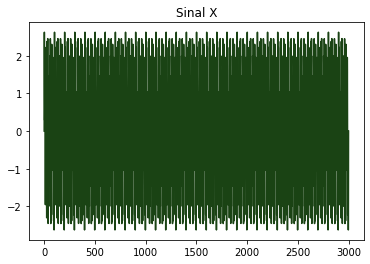

In [90]:
plt.plot(datax[0], color = '#1A4314')
plt.title('Sinal X')

Text(0.5, 1.0, 'Sinal Y')

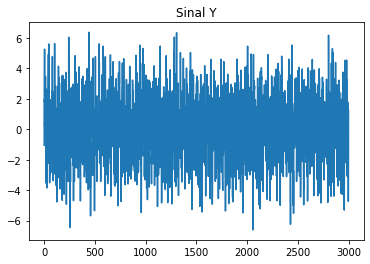

In [33]:
plt.plot(datay[0])
plt.title("Sinal Y")

In [34]:
from scipy.fft import fft, fftfreq

In [44]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

In [62]:
x, y = generate_sine_wave(100, 1000, 3)

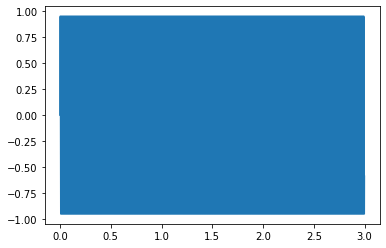

In [50]:
plt.plot(x,y)

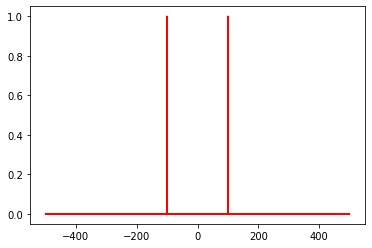

In [94]:
#Sinal X
Fs = 1000
N = (Fs * 3)  #Numero de amostras

yf1 = 2*fft(y)/N
xf1 = fftfreq(N, 1/Fs)

plt.plot(xf1, np.abs(yf1), 'r')

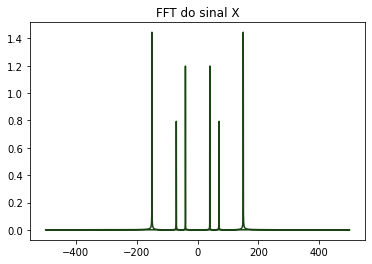

In [95]:
#Sinal X
Fs = 1000
N = (Fs * 3) + 1  #Numero de amostras

yf1 = fft(datax[0])/N #Normaliza
xf1 = fftfreq(N, 1/Fs)

plt.title("FFT do sinal X")
plt.plot(xf1, 2*np.abs(yf1), color = '#1A4314')

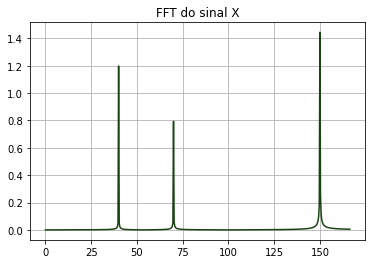

In [96]:
plt.title("FFT do sinal X")
plt.plot(xf1[0:500], 2*np.abs(yf1[0:500]), color = '#1A4314')
plt.grid()

In [101]:
freqs = []
amps = []
for i in range(0,501):
    if(2*abs(yf1[i]) > 0.5):
        freqs.append(xf1[i])
        amps.append(2*abs(yf1[i]))

In [100]:
freqs

[39.98667110963013, 69.97667444185272, 149.95001666111298]

In [102]:
amps

[1.1973547085131606, 0.7933060714831651, 1.4442537062534233]

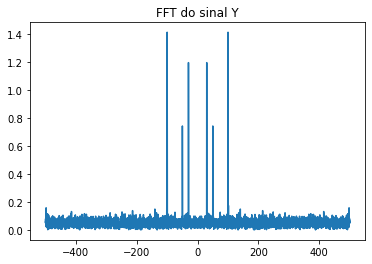

In [74]:
#Sinal Y
Fs = 1000
N = (Fs * 3) + 1  #Numero de amostras

yf2 = fft(datay[0])/N
xf2 = fftfreq(N, 1/Fs)

plt.title("FFT do sinal Y")
plt.plot(xf2, 2*np.abs(yf2))

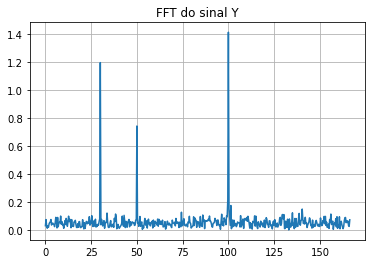

In [75]:
plt.title("FFT do sinal Y")
plt.grid()
plt.plot(xf2[0:500], 2*np.abs(yf2[0:500]))

In [104]:
freqs2 = []
amps2 = []
for i in range(0,501):
    if(2*abs(yf2[i]) > 0.5):
        freqs2.append(xf2[i])
        amps2.append(2*abs(yf2[i]))

In [105]:
freqs2

[29.990003332222596, 49.98333888703766, 99.96667777407532]

In [106]:
amps2

[1.1963052738127313, 0.743507592399777, 1.4131200443440317]

Questao 2

Questao 3

In [117]:
from scipy import signal

In [120]:
Nsamp = 2000
Fsamp = 100

In [121]:
t = np.arange(0, Nsamp/Fsamp, 1/Fsamp)

In [126]:
sig = 2.5*signal.square(2 * np.pi * 1 * t) + 2.5

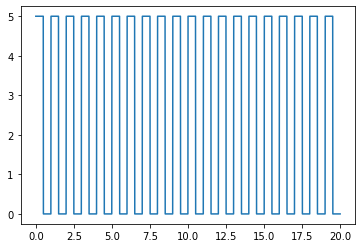

In [127]:
plt.plot(t, sig)

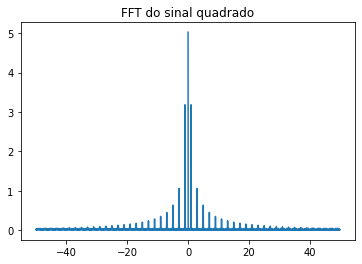

In [128]:
yf3 = fft(sig)/Nsamp
xf3 = fftfreq(Nsamp, 1/Fsamp)

plt.title("FFT do sinal quadrado")
plt.plot(xf3, 2*np.abs(yf3))